In [30]:
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import metrics 
from sklearn import tree

In [28]:
import re
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
#import seaborn as sns
import os
%matplotlib inline

In [3]:
basedir = os.getcwd()
datadir = basedir + '/data'
train = pd.read_csv(datadir + '/train.csv')

print('Number of data points:', train.shape[0])
print('Number of features:', train.shape[1])
print('Features:', train.columns.values)

train

Number of data points: 900000
Number of features: 33
Features: ['id' 'f_00' 'f_01' 'f_02' 'f_03' 'f_04' 'f_05' 'f_06' 'f_07' 'f_08'
 'f_09' 'f_10' 'f_11' 'f_12' 'f_13' 'f_14' 'f_15' 'f_16' 'f_17' 'f_18'
 'f_19' 'f_20' 'f_21' 'f_22' 'f_23' 'f_24' 'f_25' 'f_26' 'f_27' 'f_28'
 'f_29' 'f_30' 'target']


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,...,-1.594744,0.522019,0.833047,2.714125,1.290094,BABBCBBBED,455.033851,0,2,1
899996,899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,...,2.413899,-0.674942,-0.412111,-0.030436,-3.144047,BBBGBBDQBE,134.703577,0,1,0
899997,899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,...,-0.151930,-4.560773,-1.249154,1.793535,2.253696,AEBEDBBHBA,-99.536313,0,1,0
899998,899998,-1.590572,-0.509938,-1.715397,-0.249988,1.359933,1.650808,-0.058592,0,2,...,2.423670,2.110008,0.561271,-2.149610,1.019982,ADBAAADDAE,47.823039,1,2,0


In [22]:
labels = train.loc[:,['id','target']]
features = train.iloc[:,1:28]

In [23]:
features

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,2,...,0,2,-4.061370,-2.643652,-2.173853,-1.594744,0.522019,0.833047,2.714125,1.290094
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,2,...,0,0,-1.721978,0.741793,-5.190605,2.413899,-0.674942,-0.412111,-0.030436,-3.144047
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,6,...,3,0,-1.265819,1.230005,-1.361833,-0.151930,-4.560773,-1.249154,1.793535,2.253696
899998,-1.590572,-0.509938,-1.715397,-0.249988,1.359933,1.650808,-0.058592,0,2,2,...,2,5,1.035249,2.450813,-2.577817,2.423670,2.110008,0.561271,-2.149610,1.019982


In [24]:
X = features
y = labels['target']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Accuracy:  57.06444444444444
f1:  43.362598384803675
precision:  60.31108574224324
recall:  33.850114416475975


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


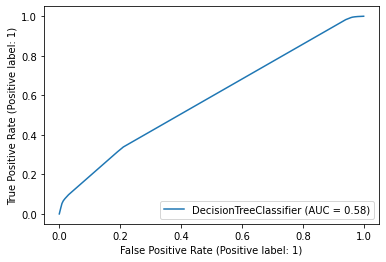

In [25]:
#using decision tree as preliminary model to determine which features are most important
# choose deep model based on data type 

# sklearn has these classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(random_state=0,max_depth = 4) 
dectree.fit(X_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(X_test)

# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

# Calculate the f1 of the model as a percent
f1 = metrics.f1_score(y_test, y_pred_dectree)
f1_percentage = 100 * f1
print('f1: ',f1_percentage)

# Calculate the precision of the model as a percent
precision = metrics.precision_score(y_test, y_pred_dectree)
precision_percentage = 100 * precision
print('precision: ',precision_percentage)

# Calculate the recall of the model as a percent
recall = metrics.recall_score(y_test, y_pred_dectree)
recall_percentage = 100 * recall
print('recall: ',recall_percentage)

metrics.plot_roc_curve(dectree, X_test, y_test)

In [32]:
dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=features.columns,class_names=['0','1'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/featuretree.txt","w+")
f.write(dot_data)
f.close()